In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Импортируем набор данных из файла diabetes.csv и поместим в объект DataFrame

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

file_path = '/content/gdrive/My Drive/diabetes.csv'

df = pd.read_csv(file_path)
print(df.head())


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Получение сводной информации о датафрейме

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Наглядное отображение количественных признаков в виде гистограмм

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

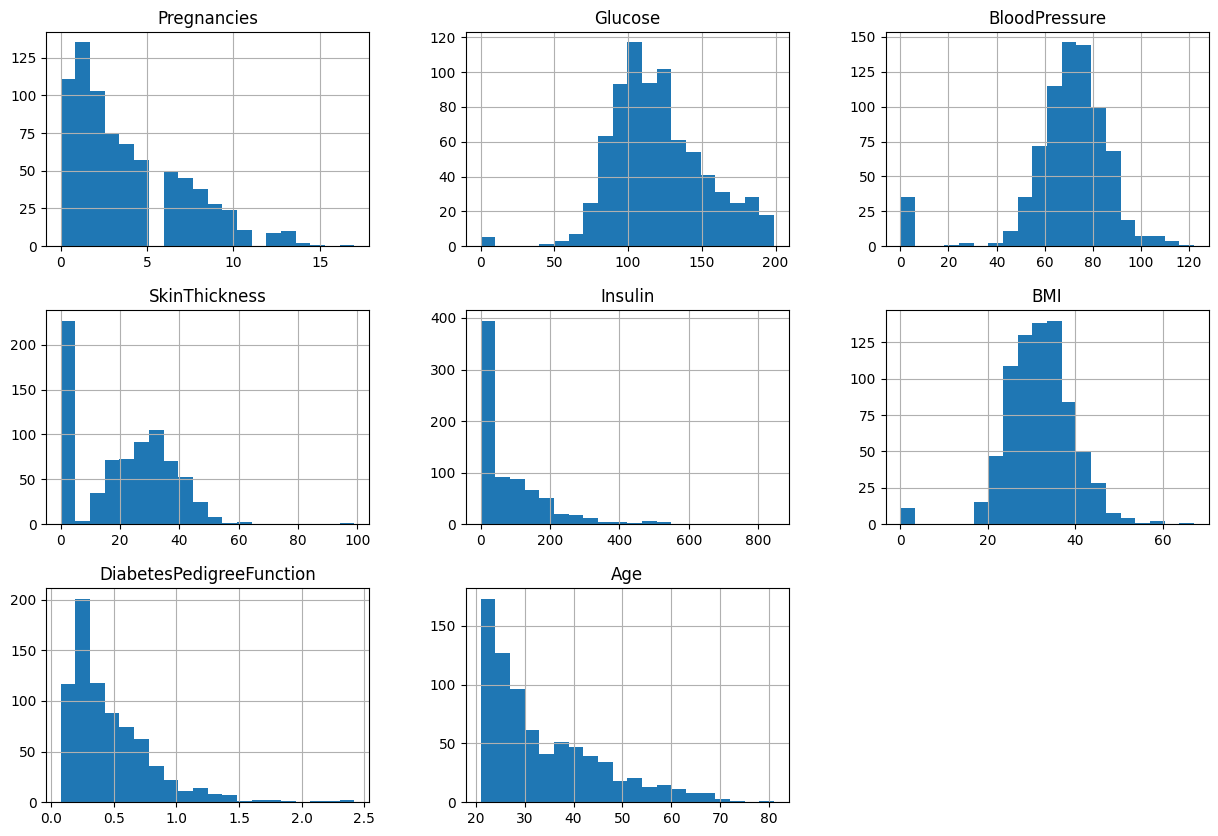

In [6]:
# выбираю только количественные признаки (все, кроме 'Outcome')
df.drop('Outcome', axis=1).hist(bins=20, figsize=(15, 10))

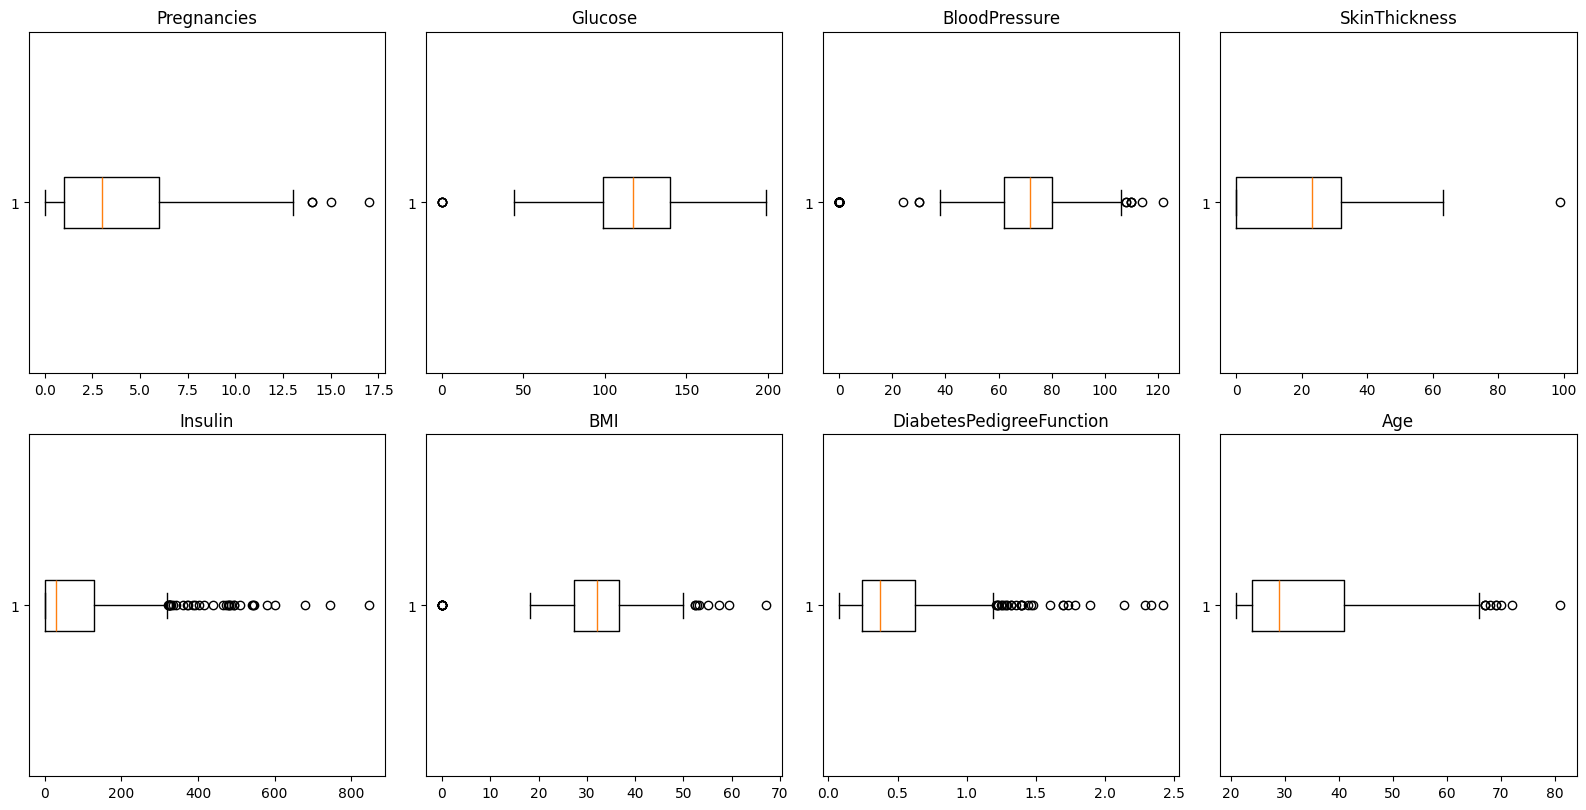

In [7]:
plt.figure(figsize=(16, 12))

quantitative_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i, col in enumerate(quantitative_cols, 1):
    plt.subplot(3, 4, i)
    plt.boxplot(df[col], vert=False)
    plt.title(col)

plt.tight_layout()
plt.show()

Распределение пациентов по диагнозу

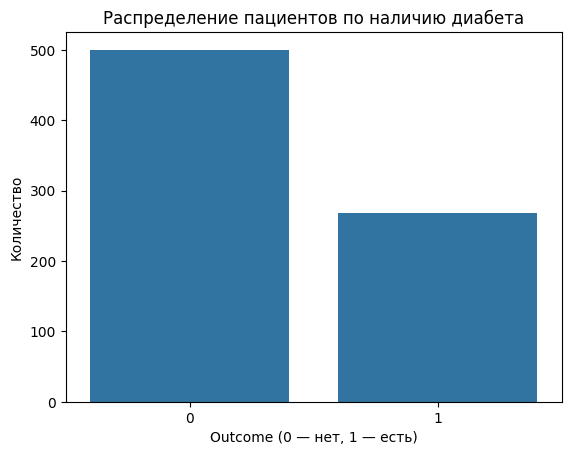

In [10]:
sns.countplot(x='Outcome', data=df)
plt.title('Распределение пациентов по наличию диабета')
plt.xlabel('Outcome (0 — нет, 1 — есть)')
plt.ylabel('Количество')
plt.show()

Попарное сравнение признаков

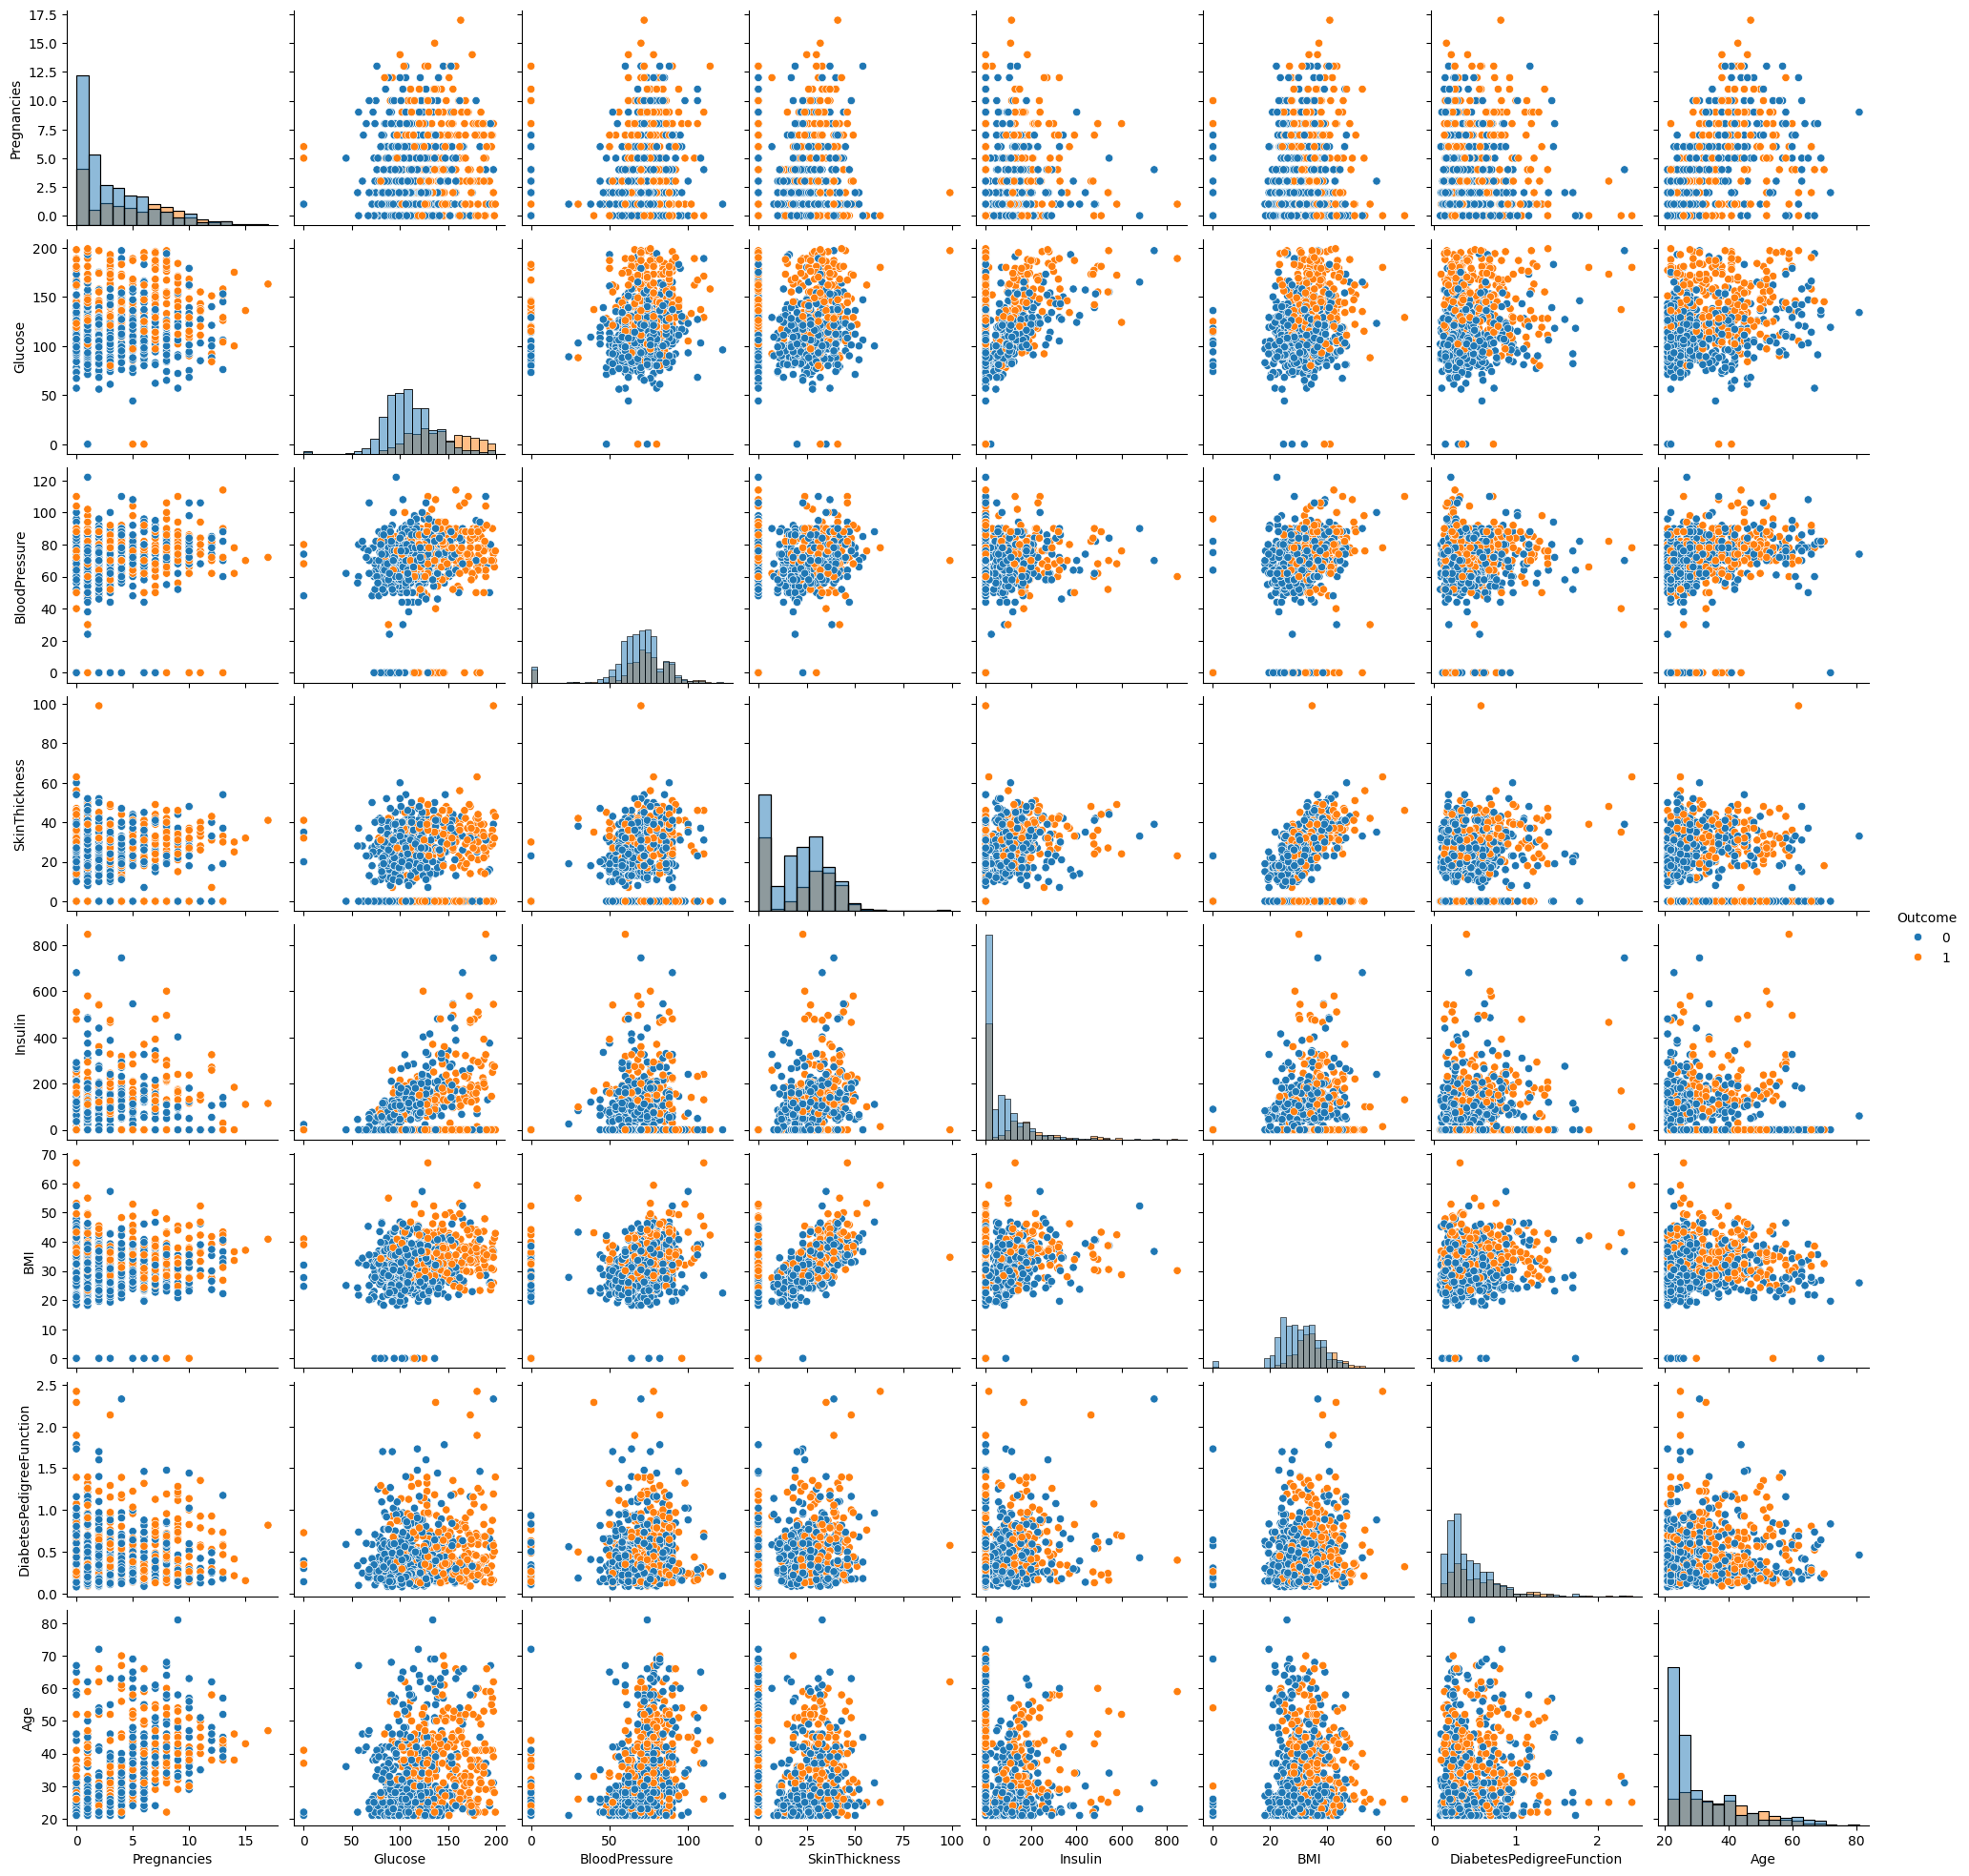

In [11]:
sns.pairplot(df, hue='Outcome', diag_kind='hist')
plt.show()

Матрица корреляции

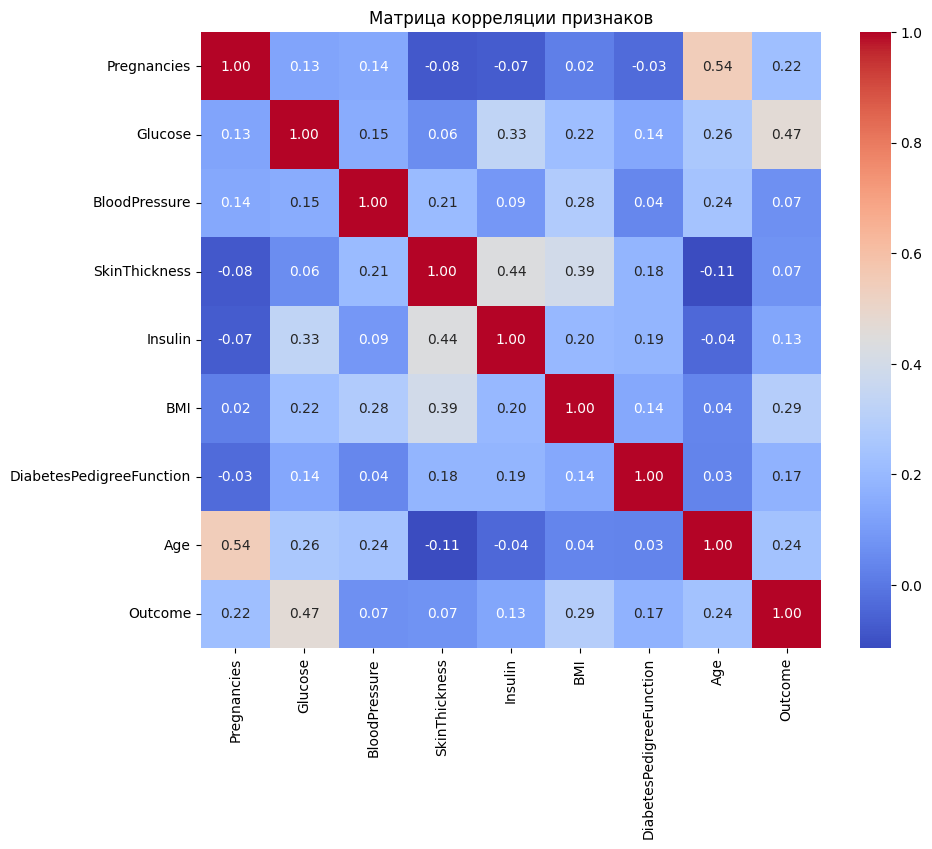

In [12]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции признаков')
plt.show()